<a href="https://colab.research.google.com/github/rishav197/Sweb-assignments-IIITD/blob/main/A2/Sweb_A2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

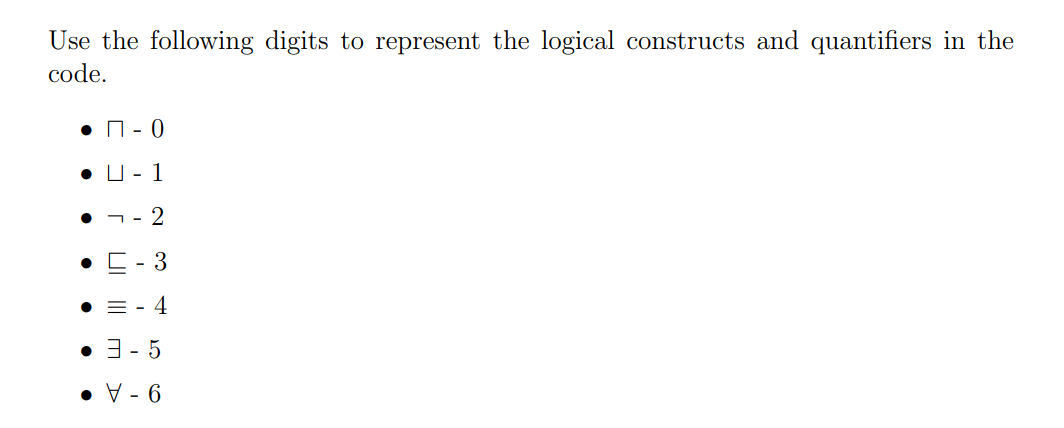

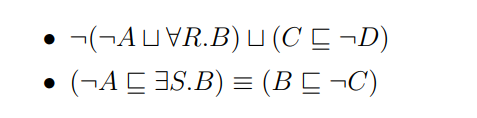

In [ ]:
dict_neg_opr = {"21":"0", "20":"1", "25":"6", "26":"5", "22":""}

In [ ]:
def apply_subset_opr(st1, st2):
  return "2"+st1+"1"+st2


def apply_biimp_opr(st1, st2):
  return "2"+st1+"1"+st2 + "0" +"2"+st2+"1"+st1


def eval_opr4(exp):
  exp = exp.split("4")
  # print(exp)

  lst2 = []
  if(len(exp)%2==0):
    for idx in range(0,len(exp),2):
      # print(idx)
      lst2.append(apply_biimp_opr(exp[idx], exp[idx+1]))
  else:
    tmp = []
    for idx in range(0,len(exp)-1,2):
      # print(idx)
      # print(exp[idx], exp[idx+1])
      tmp.append(apply_biimp_opr(exp[idx], exp[idx+1]))
    # print(tmp)

    lst2.append(apply_biimp_opr("".join(tmp), tmp[-1]))

  # print(len(lst2), lst2)
  return lst2[0]

def eval_double_negation(exp):
  if(exp.find("22")==-1):
    return exp

  return eval_double_negation(exp.replace("22", ""))


def eval_or_neg(curr_exp, lst_exp):
  if curr_exp not in lst_exp:
    return lst_exp

  pos = lst_exp.index(curr_exp)
  # print(pos)

  count=0
  for ch in curr_exp:
    lst_exp.insert(pos+1, ch)
    pos+=1
    count+=1

  del lst_exp[pos-count]
  return lst_exp


def eval_and_neg(curr_exp, lst_exp):
  if curr_exp not in lst_exp:
    return lst_exp

  pos = lst_exp.index(curr_exp)
  # print(pos)

  count=0
  for ch in curr_exp:
    lst_exp.insert(pos+1, ch)
    pos+=1
    count+=1

  del lst_exp[pos-count]
  return lst_exp



def eval_neg_operator(exp, opr):
  if(exp.find(opr)==-1):
    return exp

  return eval_neg_operator(exp.replace(opr, dict_neg_opr[opr]), opr)



def eval_neg(pos1, pos2, exp):

  st1 = exp[pos1] #string1 "2"
  st2 = exp[pos2] #string2 "exp"
  print(st1, st2)

  tmp_st = ""
  if st2.find(".")!=-1:
    pos_dot = st1.find(".")
    tmp1 = st2[0:pos_dot-2]
    tmp2 = st2[pos_dot-2:]
    print(tmp1, tmp2)
    st1 = tmp2
    st2 = tmp1

    for idx in range(len(st2)):
      if((st2[idx].isalpha() or st2[idx]=="0" or st2[idx]=="1" or st2[idx]=="5" or st2[idx]=="6") and st2[idx]!="2"):
        tmp_st += "2"
      tmp_st += st2[idx]

    tmp_st+="2"+st1

  else:
    for idx in range(len(st2)):
      if((st2[idx].isalpha() or st2[idx]=="0" or st2[idx]=="1" or st2[idx]=="5" or st2[idx]=="6") and st2[idx]!="2"):
        tmp_st += "2"

      tmp_st += st2[idx]

  print("tmp_st = ", tmp_st)

  return tmp_st

def convert_into_nnf(exp): #method to get negative normal form
  n = len(exp)

  if(exp.find("4")==-1):
    #eval for opr=3
    lst_exp = exp.split("(")
    # print(lst_exp)

    lst_tmp = []
    for ele in lst_exp:
      # print(ele)
      if(ele.find(")")):
        lst_tmp.append(ele.split(")"))
      else:
        lst_tmp.append(ele)

    # print(lst_tmp)
    lst_exp = []
    for lst in lst_tmp:
      for e in lst:
        lst_exp.append(e)

    lst_exp.remove("")
    # print(len(lst_exp), lst_exp)

    for idx in range(len(lst_exp)):
      # print(lst_exp[idx])
      if(lst_exp[idx].find("3"))==-1: #opr=3 isn't present
        pass
      else:  #opr=3 is present
        pos_of_3 = lst_exp[idx].find("3")
        # print(pos_of_3)
        curr_exp = lst_exp[idx]
        # print(curr_exp[:pos_of_3], curr_exp[pos_of_3+1:])

        lst_exp[idx] = apply_subset_opr(curr_exp[:pos_of_3], curr_exp[pos_of_3+1:])

    # print(lst_exp)

    for idx in range(len(lst_exp)):
      lst_exp[idx] = eval_double_negation(lst_exp[idx])


    # print("after double negation:")
    # print(lst_exp)
    lst_exp = eval_and_neg("02", lst_exp)
    # print(lst_exp)
    lst_exp = eval_or_neg("12", lst_exp)
    # print(lst_exp)

    # resolving negation
    pos_of_2 = []
    for idx in range(len(lst_exp)):
      if(lst_exp[idx]=="2"):
        pos_of_2.append(idx)

    # print(pos_of_2)
    for pos in pos_of_2:
      lst_exp[pos+1] = eval_neg(pos, pos+1, lst_exp)

    lst_exp = [sub_exp for sub_exp in lst_exp if sub_exp!="2"]
    print(lst_exp)

    for idx in range(len(lst_exp)):
      if((lst_exp[idx].find("0")!=-1 or lst_exp[idx].find("1")!=-1) and len(lst_exp[idx])==1):
        pass
      else:
        for key in dict_neg_opr.keys():
          # print(key, dict_neg_opr[key])
          lst_exp[idx] = eval_neg_operator(lst_exp[idx], key)

    print(lst_exp)

  else: #when exp has operator = 4
    #eval for opr=4
    exp = eval_opr4(exp)

    # print(exp)
    #eval for opr=3
    lst_exp = exp.split("(")
    # print(lst_exp)

    lst_tmp = []
    for ele in lst_exp:
      # print(ele)
      if(ele.find(")")):
        lst_tmp.append(ele.split(")"))
      else:
        lst_tmp.append(ele)

    # print(lst_tmp)
    lst_exp = []
    for lst in lst_tmp:
      for e in lst:
        lst_exp.append(e)

    lst_exp.remove("")
    print(len(lst_exp), lst_exp)

    for idx in range(len(lst_exp)):
      # print(lst_exp[idx])
      if(lst_exp[idx].find("3"))==-1: #opr=3 isn't present
        pass
      else:  #opr=3 is present
        pos_of_3 = lst_exp[idx].find("3")
        # print(pos_of_3)
        curr_exp = lst_exp[idx]
        # print(curr_exp[:pos_of_3], curr_exp[pos_of_3+1:])

        lst_exp[idx] = apply_subset_opr(curr_exp[:pos_of_3], curr_exp[pos_of_3+1:])

    print(lst_exp)

    for idx in range(len(lst_exp)):
      lst_exp[idx] = eval_double_negation(lst_exp[idx])


    print("after double negation:")
    print(lst_exp)
    lst_exp = eval_and_neg("02", lst_exp)
    print(lst_exp)
    lst_exp = eval_or_neg("12", lst_exp)
    print(lst_exp)

    # resolving negation
    pos_of_2 = []
    for idx in range(len(lst_exp)):
      if(lst_exp[idx]=="2"):
        pos_of_2.append(idx)

    # print(pos_of_2)
    for pos in pos_of_2:
      lst_exp[pos+1] = eval_neg(pos, pos+1, lst_exp)

    lst_exp = [sub_exp for sub_exp in lst_exp if sub_exp!="2"]
    print(lst_exp)


    for idx in range(len(lst_exp)):
      if((lst_exp[idx].find("0")!=-1 or lst_exp[idx].find("1")!=-1) and len(lst_exp[idx])==1):
        pass
      else:
        for key in dict_neg_opr.keys():
          # print(key, dict_neg_opr[key])
          lst_exp[idx] = eval_neg_operator(lst_exp[idx], key)

  print(lst_exp)
  return lst_exp



In [ ]:
lst_of_expressions = ["2(2A16R.B)1(C32D)",
                      "(2A35S.B)4(B32C)"]

exp1 = lst_of_expressions[0]
exp2 = lst_of_expressions[1]

print(exp1)
print(exp2)

2(2A16R.B)1(C32D)
(2A35S.B)4(B32C)


In [ ]:
print("expression =",exp2)
final_exp = convert_into_nnf(exp2)
print(final_exp)

expression = (2A35S.B)4(B32C)
8 ['2', '2A35S.B', '1', 'B32C', '02', 'B32C', '1', '2A35S.B']
['2', '22A15S.B', '1', '2B12C', '02', '2B12C', '1', '22A15S.B']
after double negation:
['2', 'A15S.B', '1', '2B12C', '02', '2B12C', '1', 'A15S.B']
['2', 'A15S.B', '1', '2B12C', '0', '2', '2B12C', '1', 'A15S.B']
['2', 'A15S.B', '1', '2B12C', '0', '2', '2B12C', '1', 'A15S.B']
2 A15S.B
A15 S.B
tmp_st =  2A21252S.B
2 2B12C
tmp_st =  22B2122C
['2A21252S.B', '1', '2B12C', '0', '22B2122C', '1', 'A15S.B']
['2A062S.B', '1', '2B12C', '0', 'B0C', '1', 'A15S.B']
['2A062S.B', '1', '2B12C', '0', 'B0C', '1', 'A15S.B']


In [ ]:
ans = ""

for idx in range(len(final_exp)):
  # print(final_exp[idx])
  if(final_exp[idx]=="0" or final_exp[idx]=="1"):
    ans += final_exp[idx]
  else:
    ans += "("+final_exp[idx]+")"


print(ans)

(2A062S.B)1(2B12C)0(B0C)1(A15S.B)
